# Project: Gapminder Analysis
Author: Wei Chong Ong

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
<li><a href="#sources">Data Sources</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Gapminder Dataset**: Gapminder Foundation is a non-profit venture registered in Stockholm, Sweden, that promotes sustainable global development and achievement of the United Nations Millennium Development Goals by increased use and understanding of statistics and other information about social, economic and environmental development at local, national and global levels. Gapminder collaborates with universities, UN, public agencies and non-governmental organizations to collect information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. Gapminder's stated mission is 'Fighting devastating ignorance with fact-based worldviews everyone can understand.'

> **Motivation**: I read the book Factfullness by Hans Rosling and I found it very fascinating and felt ashamed at the same time about my ignorance about the world. I got most of the 13 fact questions in the book wrong. Hans Rosling claimed that the majority of people scored worse than chimpanzees (worse than random). In order to find the answers myself, I decided to do the analysis using the data provided by Gapminder. For this project, I investigated four indicators which are population, age, income and life expectancy and analyzed the relationships between indicators.

> This project will explore the following questions:<ol>
   <li><p>How did the world population change over time?</p></li> 
   <li><p>What would be the world population by different age group in the future?</p></li> 
   <li><p>Where does the majority of the world population live today?</p></li> 
   <li><p>What are the top 10 most populous countries today?</p></li>
   <li><p>How did the life expectancy change over time?</p></li> 
   <li><p>What is the life expectancy vs income per person of the world by continent today?</p></li> 
</ol> 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce
import pycountry 
import pycountry_convert # Convert country name to country code and continent code
from millify import millify # Convert long numbers into a human-readable format 
from plotly.offline import init_notebook_mode, plot, iplot # Create interactive plots with plotly and cufflinks
import plotly.express as px # Create animations with Plotly
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

<a id='wrangling'></a>
## Data Wrangling
> In this section, datasets will be loaded, reshaped and cleaned for analysis.

### Read csv files into dataframes

In [2]:
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_life = pd.read_csv('life_expectancy_years.csv')
df_population = pd.read_csv('population_total.csv')
df_0_14 = pd.read_csv('population_aged_0_14_years_total_number.csv')
df_15_19 = pd.read_csv('population_aged_15_19_years_total_number.csv')
df_20_39 = pd.read_csv('population_aged_20_39_years_total_number.csv')
df_40_59 = pd.read_csv('population_aged_40_59_years_total_number.csv')
df_60p = pd.read_csv('population_aged_60plus_years_total_number.csv')

### Print out a few lines

In [3]:
df_income.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   603   603   603   603   603   603   603   603   603  ...   
1      Albania   667   667   667   667   667   668   668   668   668  ...   
2      Algeria   715   716   717   718   719   720   721   722   723  ...   
3      Andorra  1200  1200  1200  1200  1210  1210  1210  1210  1220  ...   
4       Angola   618   620   623   626   628   631   634   637   640  ...   

    2031   2032   2033   2034   2035   2036   2037   2038   2039   2040  
0   2550   2600   2660   2710   2770   2820   2880   2940   3000   3060  
1  19400  19800  20200  20600  21000  21500  21900  22300  22800  23300  
2  14300  14600  14900  15200  15500  15800  16100  16500  16800  17100  
3  73600  75100  76700  78300  79900  81500  83100  84800  86500  88300  
4   6110   6230   6350   6480   6610   6750   6880   7020   7170   7310  

[5 rows x 242 columns]

In [4]:
df_0_14.head()

country     1950     1951     1952     1953     1954     1955  \
0          Afghanistan  3180000  3240000  3280000  3330000  3380000  3430000   
1              Albania   485000   496000   507000   520000   534000   550000   
2              Algeria  3600000  3700000  3820000  3950000  4060000  4180000   
3               Angola  1820000  1860000  1910000  1960000  2010000  2070000   
4  Antigua and Barbuda    19100    19600    20000    20300    20700    21100   

      1956     1957     1958  ...      2091      2092      2093      2094  \
0  3500000  3570000  3650000  ...  12800000  12700000  12600000  12500000   
1   570000   590000   611000  ...    139000    136000    133000    130000   
2  4340000  4480000  4610000  ...  11600000  11600000  11500000  11400000   
3  2100000  2140000  2180000  ...  47700000  48100000  48400000  48700000   
4    21500    21900    22300  ...     15600     15500     15400     15400   

       2095      2096      2097      2098      2099      2100  
0  12400000  12300000  12200000  12100000  12000000  11900000  
1    126000    123000    120000    116000    113000    109000  
2  11300000  11300000  11200000  11100000  11100000  11000000  
3  49000000  49300000  49600000  49900000  50200000  50400000  
4     15300     15200     15100     15100     15000     14900  

[5 rows x 152 columns]

### Reshape the data 
The data given is appealing to human's eyes, but it is not the best format for machine. The dataframe will be reshaped by creating new variables.

In [5]:
# Create a function that melt the dataframe and sort vaues by country and year in ascending order
def melt_df(df, varnm, valnm):
    
    df_melt = []
    
    for i, x in enumerate(df):
        
        # Melt the dataframe to get the best format data
        df[i] = pd.melt(df[i], id_vars = ['country'], var_name = varnm, value_name = valnm[i])

        # Sort values by country and year
        df[i].sort_values(['country', 'year'], inplace = True)
        
        df_melt.append(df[i])
        
    return df_melt

In [6]:
dataframes = [df_population, df_income, df_life]
indicator_names = ['total_population', 'income_per_person', 'life_expectancy']

df_melt = melt_df(dataframes, 'year', indicator_names)
df_melt[0].head()

country  year  total_population
0    Afghanistan  1800           3280000
195  Afghanistan  1801           3280000
390  Afghanistan  1802           3280000
585  Afghanistan  1803           3280000
780  Afghanistan  1804           3280000

### Merge multiple dataframes

In [7]:
# Merge multiple dataframes using the reduce() and lambda function
df_combined = reduce(lambda left,right: pd.merge(left,right,on=['country','year'],how='left'), df_melt)

In [8]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58695 entries, 0 to 58694
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            58695 non-null  object 
 1   year               58695 non-null  object 
 2   total_population   58695 non-null  int64  
 3   income_per_person  46513 non-null  float64
 4   life_expectancy    55528 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ MB


In [9]:
# Convert 'year' variable from string to integer
df_combined['year'] = pd.to_numeric(df_combined['year'])

### Find out rows with missing values in column 'income_per_person' and 'life expectancy'

In [10]:
# The data for income_per person only available from year 1800 to 2040. 
# As it doesn't affect the analysis, no action needs to be done to handle these missing values.
df_combined[df_combined['income_per_person'].isnull()]

country  year  total_population  income_per_person  life_expectancy
241    Afghanistan  2041          57700000                NaN             69.4
242    Afghanistan  2042          58600000                NaN             69.6
243    Afghanistan  2043          59400000                NaN             69.7
244    Afghanistan  2044          60200000                NaN             69.9
245    Afghanistan  2045          61000000                NaN             70.1
...            ...   ...               ...                ...              ...
58690     Zimbabwe  2096          30900000                NaN             75.1
58691     Zimbabwe  2097          31000000                NaN             75.3
58692     Zimbabwe  2098          31000000                NaN             75.4
58693     Zimbabwe  2099          31000000                NaN             75.5
58694     Zimbabwe  2100          31000000                NaN             75.7

[12182 rows x 5 columns]

In [11]:
# There are several countries without life expectancy data. These countries will be removed.
df_combined[df_combined['life_expectancy'].isnull()]['country'].unique()

array(['Andorra', 'Dominica', 'Holy See', 'Liechtenstein',
       'Marshall Islands', 'Monaco', 'Nauru', 'Palau', 'San Marino',
       'St. Kitts and Nevis', 'Tuvalu'], dtype=object)

In [12]:
# Drop countries with missing data in life_expectancy
df_combined.dropna(subset=['life_expectancy'],inplace=True)

# Reset index and drop old index
df_combined.reset_index(drop=True, inplace=True)

In [13]:
# Check
df_combined['life_expectancy'].isnull().any()

False

### Determine the continent of each country for later exploratory analysis
pycountry library will be used to determine the country code from the country name. The country code will then be converted to continent code.

In [14]:
# Create a function to assign country and continent code to the country using pycountry library
def find_country_code(x):

    try:
        # Get the alpha_2 code from country name
        country_code = pycountry.countries.lookup(x).alpha_2
        
        # Get the continent code from the alpha_2 code
        continent = pycountry_convert.country_alpha2_to_continent_code(country_code)
    except: 
        country_code = np.nan
        continent = np.nan
        
    return country_code, continent

In [15]:
# Create a dataframe with country and continent code
df_code = pd.DataFrame.from_records(df_combined['country'].apply(find_country_code), columns =['country_code', 'continent'])

# Add the dataframe to the main dataframe
df_combined = pd.concat([df_combined, df_code], axis=1)

In [16]:
df_combined.query('country == "Brunei"')

country  year  total_population  income_per_person  life_expectancy  \
6971  Brunei  1800              2260             1510.0             29.2   
6972  Brunei  1801              2260             1510.0             29.2   
6973  Brunei  1802              2260             1510.0             29.2   
6974  Brunei  1803              2260             1510.0             29.2   
6975  Brunei  1804              2260             1510.0             29.2   
...      ...   ...               ...                ...              ...   
7267  Brunei  2096            399000                NaN             85.3   
7268  Brunei  2097            397000                NaN             85.4   
7269  Brunei  2098            395000                NaN             85.5   
7270  Brunei  2099            392000                NaN             85.6   
7271  Brunei  2100            390000                NaN             85.7   

     country_code continent  
6971          NaN       NaN  
6972          NaN       NaN  
6973          NaN       NaN  
6974          NaN       NaN  
6975          NaN       NaN  
...           ...       ...  
7267          NaN       NaN  
7268          NaN       NaN  
7269          NaN       NaN  
7270          NaN       NaN  
7271          NaN       NaN  

[301 rows x 7 columns]

In [17]:
# Find out the countries that are not included in the pycountry library
df_combined[df_combined['country_code'].isnull()]['country'].unique()

array(['Brunei', 'Cape Verde', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Iran', 'Micronesia, Fed. Sts.', 'North Korea',
       'Palestine', 'Russia', 'South Korea', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Syria', 'Timor-Leste'],
      dtype=object)

In [18]:
# Create map for the missing countries
country_code_map = {
    "Brunei": "BN",
    "Cape Verde": "CV",
    "Congo, Dem. Rep.": "CD",
    "Congo, Rep.": "CG",
    "Cote d'Ivoire": "CI",
    "Iran": "IR",
    "Micronesia, Fed. Sts.": "FM",
    "North Korea": "KP",
    "Palestine": "PS",
    "Russia": "RU",
    "South Korea": "KR",
    "St. Lucia": "LC",
    "St. Vincent and the Grenadines": "VC",
    "Syria": "SY",
    "Timor-Leste": "TL"}

continent_map = {
    "Brunei": "AS",
    "Cape Verde": "AF",
    "Congo, Dem. Rep.": "AF",
    "Congo, Rep.": "AF",
    "Cote d'Ivoire": "AF",
    "Iran": "AS",
    "Micronesia, Fed. Sts.": "OC",
    "North Korea": "AS",
    "Palestine": "AS",
    "Russia": "AS",
    "South Korea": "AS",
    "St. Lucia": "NA",
    "St. Vincent and the Grenadines": "NA",
    "Syria": "AS",
    "Timor-Leste": "AS"}

In [19]:
# Input the missing values of country code and continent using the maps created above
for i in df_combined[df_combined['country_code'].isnull()].index:
    df_combined.loc[i, 'country_code'] = country_code_map[df_combined.loc[i, 'country']]
    df_combined.loc[i, 'continent'] = continent_map[df_combined.loc[i, 'country']]

In [20]:
print('missing country code: {}' .format(df_combined['country_code'].isnull().any()))
print('missing continent code: {}' .format(df_combined['continent'].isnull().any()))

missing country code: False
missing continent code: False


### Melt and merge multiple age group dataframes 

In [21]:
# The dataframe will be reshape by creating new variables
age_dataframes = [df_0_14, df_15_19, df_20_39, df_40_59, df_60p]
age_names = ['Age_0-14', 'Age_15-19', 'Age_20-39', 'Age_40-59', 'Age_60+']

df_age_melt = melt_df(age_dataframes, 'year', age_names)
df_age_melt[0].head()

country  year  Age_0-14
0    Afghanistan  1950   3180000
184  Afghanistan  1951   3240000
368  Afghanistan  1952   3280000
552  Afghanistan  1953   3330000
736  Afghanistan  1954   3380000

In [22]:
# Merge multiple dataframes using the reduce() and lambda function
df_age_combined = reduce(lambda left,right: pd.merge(left,right,on=['country','year'],how='inner'), df_age_melt)
df_age_combined.head()

country  year  Age_0-14  Age_15-19  Age_20-39  Age_40-59  Age_60+
0  Afghanistan  1950   3180000     784000    2230000    1170000   390000
1  Afghanistan  1951   3240000     790000    2250000    1170000   396000
2  Afghanistan  1952   3280000     801000    2280000    1170000   401000
3  Afghanistan  1953   3330000     815000    2310000    1180000   404000
4  Afghanistan  1954   3380000     830000    2350000    1190000   406000

In [23]:
# Melt the age dataframe again to create another new variable 'age_group'
df_age_group = pd.melt(df_age_combined, id_vars = ['country', 'year'], 
                       var_name = 'age_group', value_name = 'population')

In [24]:
df_age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138920 entries, 0 to 138919
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   country     138920 non-null  object
 1   year        138920 non-null  object
 2   age_group   138920 non-null  object
 3   population  138920 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 4.2+ MB


In [25]:
# Convert 'year' variable to integer
df_age_group['year'] = pd.to_numeric(df_age_group['year'])

<a id='eda'></a>
## Exploratory Data Analysis
> In this section, all the research questions will be answered through data analysis and visualization.

In [26]:
# Custom color palette for visualization
colors = ['lightgrey', 'lightcoral', 'lightskyblue', 'palegreen' ,'bisque', 'aquamarine', 'plum', 'lightsteelblue', 'khaki', 'paleturquoise']

### Research Question 1:  How did the world population changed over time?

In [27]:
# Create dataframes of total population
df_total_from_1950_to_2020 = df_age_group.query('year <=2020').groupby('year')['population'].sum()
df_total_from_2020_to_2100 = df_age_group.query('year >=2020').groupby('year')['population'].sum()

# Create dataframes with only children between 0 and 14 years old 
df_child = df_age_group[df_age_group['age_group']=='Age_0-14']
df_child_from_1950_to_2020 = df_child.query('year <=2020').groupby('year')['population'].sum()
df_child_from_2020_to_2100 = df_child.query('year >=2020').groupby('year')['population'].sum()

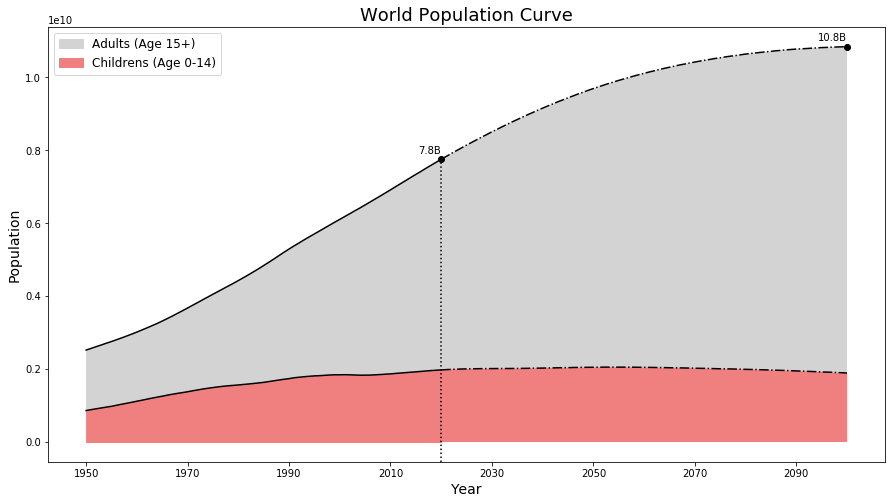

In [28]:
# Create stacked area chart of world population curve seperating adults and childrens
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_total_from_1950_to_2020, color = 'black')
ax.plot(df_total_from_2020_to_2100, color = 'black', ls = '-.', marker = 'o', markevery = 80)
ax.plot(df_child_from_1950_to_2020 , color = 'black')
ax.plot(df_child_from_2020_to_2100, color = 'black', ls = '-.')
ax.axvline(x=2020, ymin=0, ymax=0.7,linewidth=1.5, color='black', ls = ':')
ax.set_xlabel('Year',fontsize = 14)
ax.set_ylabel('Population',fontsize = 14)
ax.set_title('World Population Curve',fontsize = 18)
ax.fill_between(df_total_from_1950_to_2020.index, df_total_from_1950_to_2020, df_child_from_1950_to_2020, color = colors[0], label='Adults (Age 15+)')
ax.fill_between(df_total_from_2020_to_2100.index, df_total_from_2020_to_2100, df_child_from_2020_to_2100, facecolor = colors[0]) # hatch = '/'
ax.fill_between(df_child_from_1950_to_2020.index, df_child_from_1950_to_2020, color = colors[1], label='Childrens (Age 0-14)')
ax.fill_between(df_child_from_2020_to_2100.index, df_child_from_2020_to_2100, facecolor = colors[1]) # hatch = '.'

# Create a function to add annotations 
def labelmarker(df, years):
    for year in years:
        ax.annotate('{}'.format(millify(df[year],precision=1)), 
                    xy = (year, df[year]),
                    xytext = (year, df[year]+1e8),
                    ha='right', va='bottom')
    
labelmarker(df_total_from_2020_to_2100, [2020, 2100])

x_ticks = np.arange(1950, 2100, 20)
ax.set_xticks(x_ticks)
ax.legend(loc='upper left', fontsize = 'large');

- The world population is increasing very fast. From roughly 2.5 billion of people in 1950 to 7.8 billion of people today. It is predicted to reach 10.8 billion of people in 2100. 
- However, the number of children is not expected to increase. The children line gets flat. The UN experts are reporting that the number of children has stopped increasing since 10 years ago. It is probably because of the drop in the average number of babies per woman.

### Research Question 2: What would be the world population by different age group in the future?
> From the diagram above we know that there will be a large increase in people above 15 years old in the next 60 years while the child population will remain almost constant. Now, we dive into details to find out which age group of people will increase the most.

In [29]:
# Create dataframes for the total population in 2020, 2060 and 2100 by age group
year_2020 = df_age_group.groupby(['year','age_group'])['population'].sum().loc[2020]
year_2060 = df_age_group.groupby(['year','age_group'])['population'].sum().loc[2060]
year_2100 = df_age_group.groupby(['year','age_group'])['population'].sum().loc[2100]

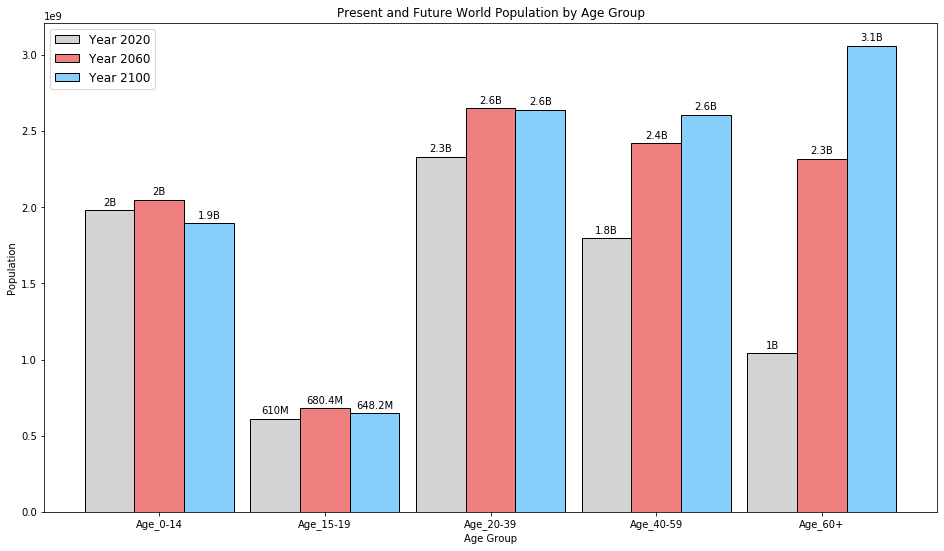

In [30]:
# Create bar charts of present and future world population by Age Group
fig, ax = plt.subplots(figsize=(16,9))
ind = np.arange(5)  # the x locations for the groups
width = 0.3   # the width of the bars
bars1 = ax.bar(ind, year_2020, width, color = colors[0], edgecolor = 'black', label='Year 2020')
bars2 = ax.bar(ind + width, year_2060, width, color = colors[1], edgecolor = 'black', label='Year 2060')
bars3 = ax.bar(ind + width + width, year_2100, width, color = colors[2], edgecolor = 'black', label='Year 2100')
ax.set_ylabel('Population')
ax.set_xlabel('Age Group')
ax.set_title('Present and Future World Population by Age Group')
locations = ind + width # xtick locations
labels = ['Age_0-14', 'Age_15-19', 'Age_20-39', 'Age_40-59', 'Age_60+']
ax.set_xticks(locations)
ax.set_xticklabels(labels)
ax.legend(fontsize = 'large')

def autolabel(bars):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(millify(height,precision=1)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.show()

- Largest population in the present is the people between 20-39 years old while in the future, the largest group will be the people above 60 years old.

- The age group between 0 to 14 years old and between 15 and 19 years old are expected to remaining the same in the future. The large increase in population is going to happen not because there are more children and teenagers. In fact, it will happen because the children and teenages who already exist today are going to grow up and occupy the adult groups. Population above 60 years old is going to increase by 200% in the next 80 years. 

### Research Question 3: Where does the majority of the world population live today?

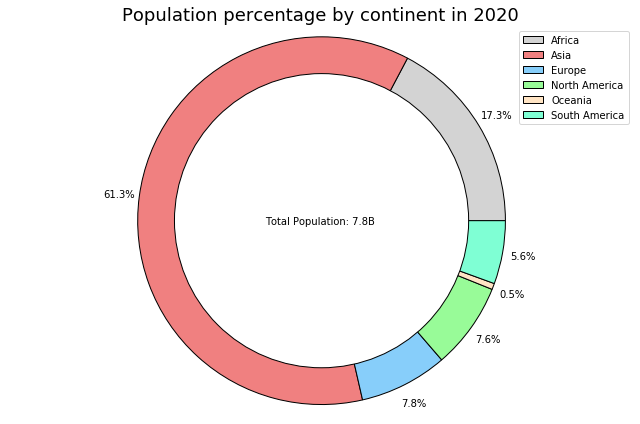

In [31]:
# Create dataframe of year 2020
df_2020 = df_combined.query('year == 2020')

# Calculate continent to world population ratio
ratio = df_2020.groupby('continent')['total_population'].sum()/df_2020['total_population'].sum()

# Create pie chart, where the slices will be ordered and plotted counter-clockwise
fig, ax = plt.subplots(figsize=(9,6))
labels = 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'
sizes = ratio
ax.pie(sizes, colors = colors, autopct='%1.1f%%', pctdistance=1.11, wedgeprops={"edgecolor":"black"})
ax.legend(labels, loc = "upper right")

# Draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white', edgecolor = 'black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Population percentage by continent in 2020", fontsize = 18)
plt.text(0.5, 0.5, 'Total Population: {}'.format(millify(df_2020['total_population'].sum(),precision=1)), 
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
         fontsize = 10)
plt.tight_layout()
plt.show()

- More than half of the world population live in Asia while Africa has the second largest population in the world. 
- Europe and in North America have almost equal population with 7.8% and 7.6% of the total population respectively. 
- South America has 5.6% of the world population whereas Ocenania, which is the smallest continent, has the smallest population with only 0.5%.

### Research Question 4: What are the top 10 most populous countries today?

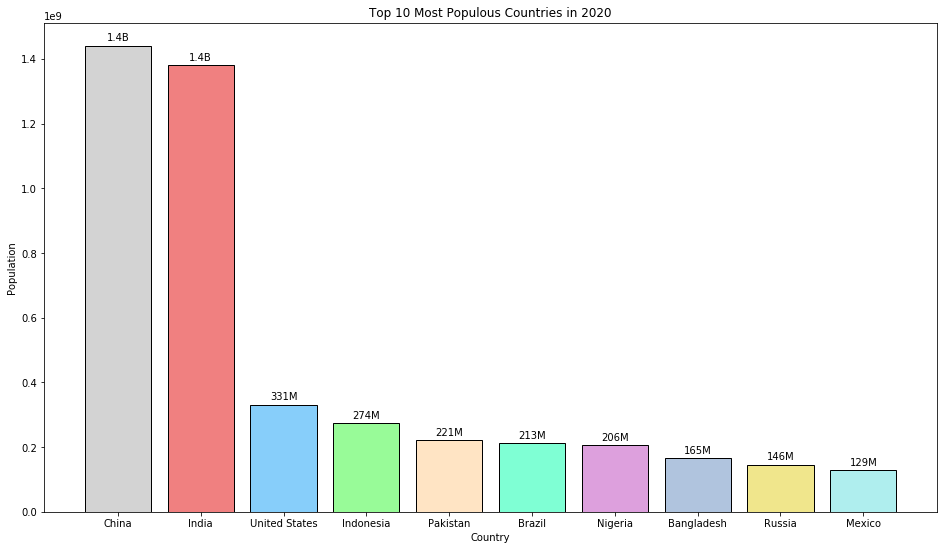

In [32]:
# Dive deeper into each continent to discover the top 10 most populous countries in 2020
df_top10_populous_country =  df_2020.sort_values(['total_population'], ascending = False).iloc[:10,:]
countries = df_top10_populous_country['country']
population = df_top10_populous_country['total_population']
fig, ax = plt.subplots(figsize=(16,9))
bar = ax.bar(countries, population, color = colors, edgecolor = 'black')
ax.set_xlabel('Country')
ax.set_ylabel('Population')
ax.set_title('Top 10 Most Populous Countries in 2020')
autolabel(bar)
plt.show()

- Both China and India have about 1.4 billion of population, which is much higher than any other countries in the world. 
- United States is in the third place with 3.3 million of people. 
- Interestingly, even though Africa is the second most populous continent, Nigeria is the only African country is the top 10 list.

### Research Question 5:  How did the life expectancy changed over time?

In [33]:
# Create a dataframe from 1800 to 2020
df_from_1800_to_2020 = df_combined.query('year <= 2020')

# Calculate the average life expectancy
avg_life = df_from_1800_to_2020.groupby('year')['life_expectancy'].median()

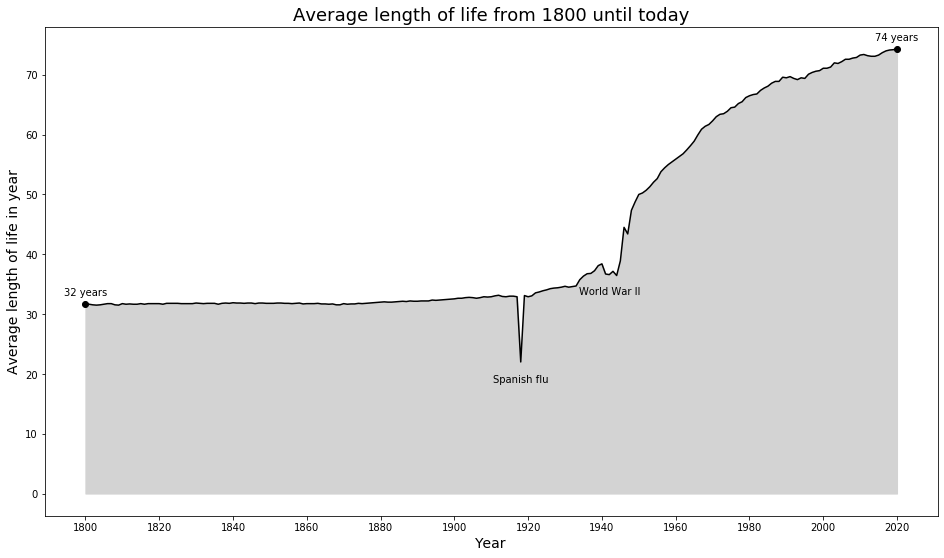

In [34]:
# Create area chart of the average length of life from 1800 until today
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(avg_life, color = 'black', marker = 'o', markevery = 220)
ax.fill_between(avg_life.index, avg_life, color = colors[0])
ax.set_xlabel('Year',fontsize = 14)
ax.set_ylabel('Average length of life in year',fontsize = 14)
ax.set_title('Average length of life from 1800 until today',fontsize = 18);
x_ticks = np.arange(1800, 2040, 20)
ax.set_xticks(x_ticks)

# Create a function to add annotations of the average life length
def label(series, years):
    for year in years:
        ax.annotate('{0:.2g} years'.format(series[year]), 
                    xy = (year, series[year]),
                    xytext = (year, series[year]+1),
                    ha='center', va='bottom')
    
label(avg_life, [1800, 2020])

# Add annotations of the big incidents happened in the history that caused drops in life expectancy curve
years = [1918, 1942]
incidents = ['Spanish flu', 'World War II']
for i in range(len(years)):
    ax.annotate(incidents[i], xy = (years[i], avg_life[years[i]]), xytext = (years[i], avg_life[years[i]]-2), 
                ha='center', va='top')
    
plt.show()

- Back in 1800, life expenctancy was roughly 32 years everywhere in the world. The average life expectancy across the world today is 74. 
- There is a dip the global life expectancy curve in 1918 was due to Spanish flu pandemic. 
- The fluctuation between 1939 and 1945 was the result of World War II.

### Research Question 6:  What is the life expectancy vs income of the world by continent today?

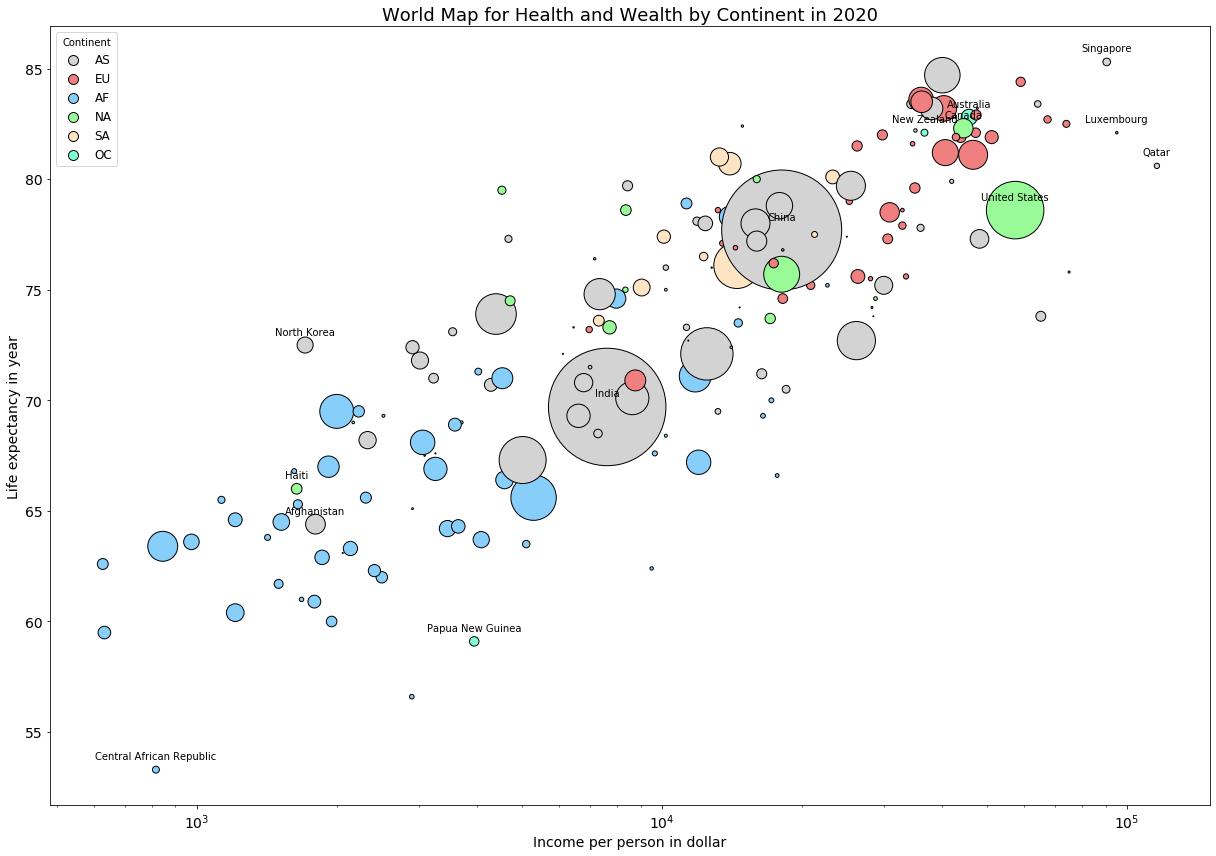

In [35]:
# Create bubble chart
# Each bubble is a country and it's size represent the population.
# The bigger the size, the larger the population of the country.

# Assign colors to each continent
color_map = {
    "AS": colors[0], 
    "EU": colors[1], 
    "AF": colors[2], 
    "NA": colors[3], 
    "SA": colors[4], 
    "OC": colors[5]  
}

# Add the colors to the continents
df_2020['color'] = df_2020['continent'].apply(lambda x: color_map[x])

fig, ax = plt.subplots(figsize = (17,12))
x = df_2020["income_per_person"]
y = df_2020["life_expectancy"]
c = np.array(df_2020["color"])
size = df_2020["total_population"]
ax.scatter(x = x, y = y, c = c, s=size/100000, edgecolors = "black")

# Customize legends
for continent in list(df_2020['continent'].unique()):
    ax.scatter([], [], alpha=1, c = color_map[continent], label=str(continent), s = 100, edgecolors = "black")

ax.set_ylabel("Life expectancy in year", fontsize = 14)
ax.set_xlabel("Income per person in dollar", fontsize = 14)
ax.set_xscale('log') # Set logarithm x axis scale
ax.tick_params(axis='both', which='major', labelsize=14) # Set tick label font size
ax.set_title("World Map for Health and Wealth by Continent in 2020", fontsize = 18)
ax.legend(title='Continent', loc='upper left', fontsize = 'large')

# Create a function to add annotations of country names 
def countrymarker(df, years):
    for country in country_label:
        xcoord = df_2020[df_2020['country']==country]['income_per_person']
        ycoord = df_2020[df_2020['country']==country]['life_expectancy']
        ax.annotate(country, 
                    xy = (xcoord, ycoord),
                          xytext = (xcoord, ycoord+0.6),
                          ha='center', va='center');
    
country_label = ['China', 'India', 'Afghanistan', 'North Korea', 'Qatar', 'Canada', 
                 'United States', 'New Zealand', 'Australia', 'Haiti', 'Papua New Guinea',
                 'Central African Republic', 'Singapore', 'Luxembourg']
countrymarker(df_2020, country_label)

plt.tight_layout()
plt.show()

In [36]:
# Calculate the average life expectancy and average income_per_person by continent
df_2020.groupby('continent')[['life_expectancy', 'income_per_person']].median().sort_values(['income_per_person'], ascending = False)

life_expectancy  income_per_person
continent                                    
EU                    81.1            34050.0
NA                    75.0            14700.0
SA                    76.8            13650.0
AS                    74.8            12500.0
OC                    68.7             5040.0
AF                    65.6             3075.0

There is a correlation between income and health. People live longer in richer countries. Still, there is a huge difference in life expectancy between countries on the same income level, depending on how the money is distributed and how it is used. 

- The spread of GDP per capita in Asia is the biggest, from the lowest North Korea (1.71k) to the highest Qatar (116k). Singapore has both very high GDP per capita and life expectancy
- The spread in European and South American countries is relatively small compared to other continents. Europe has the both high life expectancy and and income per person. Luxembourg is the leader in this category.
- In the North America continent, Canada has the highest life expentancy while people in the US has the higher average income per person. Haiti is the outlier in this continent. Haiti is the poorest country and has the lowest life expectancy.
- New Zealand and Australia are the outliers in Oceania. Without considering these two countries, the average life expectancy is 69 and the income per person is only around 5k dollar.
- The average life expectancy and average income in Africa are relatively low compared to other continents.

### Bonus: Create cufflinks bubble chart to produce the interactive data visualizations. 

In [37]:
df_2020.iplot(kind='bubble',x="income_per_person",y="life_expectancy",
              size='total_population', categories='continent', text='country',
              xTitle='GDP per capita', yTitle='Life Expectancy', logx=True,
              title='World map for health and wealt by continent in 2020', theme="white", 
              colors = px.colors.qualitative.T10);

/opt/anaconda3/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/opt/anaconda3/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



### Bonus Question: How did the life expectancy and the income per person change over time?

In [38]:
# Create a dataframe from 1920 to 2020
df_from_1920_to_2020 = df_combined.query('year >= 1920').query('year <= 2020')

### Create animation with Plotly Express

In [39]:
fig = px.scatter(df_from_1920_to_2020, x="income_per_person", y="life_expectancy", 
           animation_frame="year", animation_group="country",
           size="total_population", color="continent", hover_name="country",
           size_max=55, log_x=True, range_x=[100,100000], range_y=[20,90], 
           title="Global Transformation in Human Health and Wealth in the last 100 years",
           template ="none", color_discrete_sequence = px.colors.qualitative.T10)


fig.update_layout(
    xaxis_title='GDP per capita',
    yaxis_title='Life Expentancy',
    legend_title_text='Continent'
)

fig.show()

<a id='conclusions'></a>
## Conclusions
> **Limitations:**
- For the analysis, some countries were dropped out of the dataframe due to missing data of life expectancy: Andorra, Dominica, Holy See, Liechtenstein, Marshall Islands, Monaco, Nauru, Palau, San Marino, St. Kitts and Nevis, Tuvalu

> **Summary statistic and plots:**
- There is an overall upward trend for the world population, the income per person and the life expectancy.
- The world population is increasing rapidly is because of the increasing number of adults. The number of children remained almost constant for the last 50 years and will stay the same in the future.
- Income per person and life expectancy are correclated. People live longer in richer countries and the average length of life of people in poorer countries is relatively shorter. Nevertheless, there is still a huge difference in life expectancy between countries on the same income level.

<a id='references'></a>
## References & Data Sources

> **References:**
- Merging dataframe: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
- Multiple bar charts with markers: https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
- Pie chart: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
- Animations with Plotly: https://plotly.com/python/animations/

> **Data Sources:**
- **Dataset: Population, total**
    - Description: Total population
    - Sourcelink: http://gapm.io/dpop
    - Version: 6
- **Dataset: Population aged 0-14, 15-19, 20-39, 40-59, 60+**
    - Description: Population by Age Groups, Both Sexes
    - Sourcelink: https://www.gapminder.org/data/
    - Version: -
- **Dataset: Life expectancy (years)**
    - Description: The average number of years a newborn child would live if current mortality patterns were to stay the same</li>
    - Sourcelink: http://gapm.io/ilex
    - Version: 11
- **Dataset: Income per person (GPD/Capita, PPP$ inflation-adjusted)**
    - Description: Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP)
    - Sourcelink: http://gapm.io/dgdppc
    - Version: 26

In [1]:
# Generate .html file in the workspace directory 
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_Gapminder.ipynb'])

0